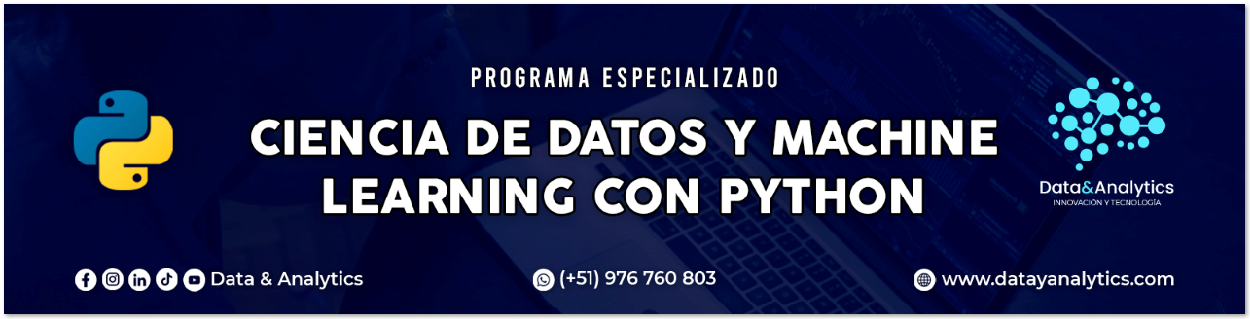

#DATA & ANALYTICS



----------------------------

Instructor: Angelo Jonathan Diaz Soto

E-mail: ajdiazsoto@gmail.com

Web: www.datayanalytics.com

# Modelos predictivos bajo el enfoque de regresión

La regresión lineal es el algoritmo más simple en el aprendizaje automático, se puede entrenar de diferentes maneras. En este Notebook cubriremos los siguientes algoritmos lineales:

1. Regresión lineal
2. Regresión de Ridge
3. Regresión LASSO
4. Elastic Net
5. Regresión polinomial
6. Descenso de gradiente estocástico
7. Redes neuronales artificiales

Vamos a utilizar el conjunto de datos `USA_Housing`. Dado que el precio de la vivienda es una variable continua, se trata de un problema de regresión.

Los datos contienen las siguientes columnas:



* '`Avg. Area Income`': Promedio de ingresos de los residentes de la ciudad donde se ubica la casa.
* '`Avg. Area House Age`': Edad promedio de las casas en la misma ciudad.
* '`Avg. Area Number of Rooms`': Número promedio de habitaciones para casas en la misma ciudad.
* '`Avg. Area Number of Bedrooms`': Número medio de dormitorios para casas en la misma ciudad.
* '`Area Population`': La población de la ciudad donde se encuentra la vivienda.
* '`Price`': Precio al que se vendió la casa.
* '`Address`': Dirección de la casa.


# Importando librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Mydrive/Data/Data_modulo1"

 bank.csv		   hotel_booking.csv   'Online Retail.xlsx'   wineQualityReds.csv
 comprar_alquilar.csv	   insurance.csv        Spotify-2000.csv
 comprar_alquilar.xlsx	   Mall_Customers.csv   USA_Housing.csv
 credit_card_default.csv   Market_basket.csv    USA_Housing.xlsx


### Cargando la data

In [ ]:
USAhousing = pd.read_csv('/content/drive/My Drive/Mydrive/Data/Data_modulo1/USA_Housing.csv')
USAhousing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [ ]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Análisis exploratorio

In [ ]:
# Explorando la cantidad de valores perdidos en las variables
USAhousing.isna().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


In [ ]:
#Recordando del ejemplo de la clase anterior

df = pd.read_csv("/content/drive/My Drive/Mydrive/Data/Data_modulo1/bank.csv")
numerical_features = ["age",	"duration",	"campaign",	"pdays",	"previous",	"emp.var.rate",
                      "cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"]
categorical_features = ["job","marital","education","default","housing","loan","contact","month","day_of_week"]
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
from numpy import nan
df[["age","duration","campaign","pdays",
                     "previous","emp.var.rate","cons.price.idx","cons.conf.idx",
                    "euribor3m","nr.employed"]]=df[["age","duration","campaign","pdays",
                     "previous","emp.var.rate","cons.price.idx","cons.conf.idx",
                    "euribor3m","nr.employed"]].replace(0,nan)
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df[["duration","pdays","previous"]]

,duration,pdays,previous
0,261.0,999.0,NaN
1,149.0,999.0,NaN
2,226.0,999.0,NaN
3,151.0,999.0,NaN
4,307.0,999.0,NaN
...,...,...,...
41183,334.0,999.0,NaN
41184,383.0,999.0,NaN
41185,189.0,999.0,NaN
41186,442.0,999.0,NaN


<Axes: >

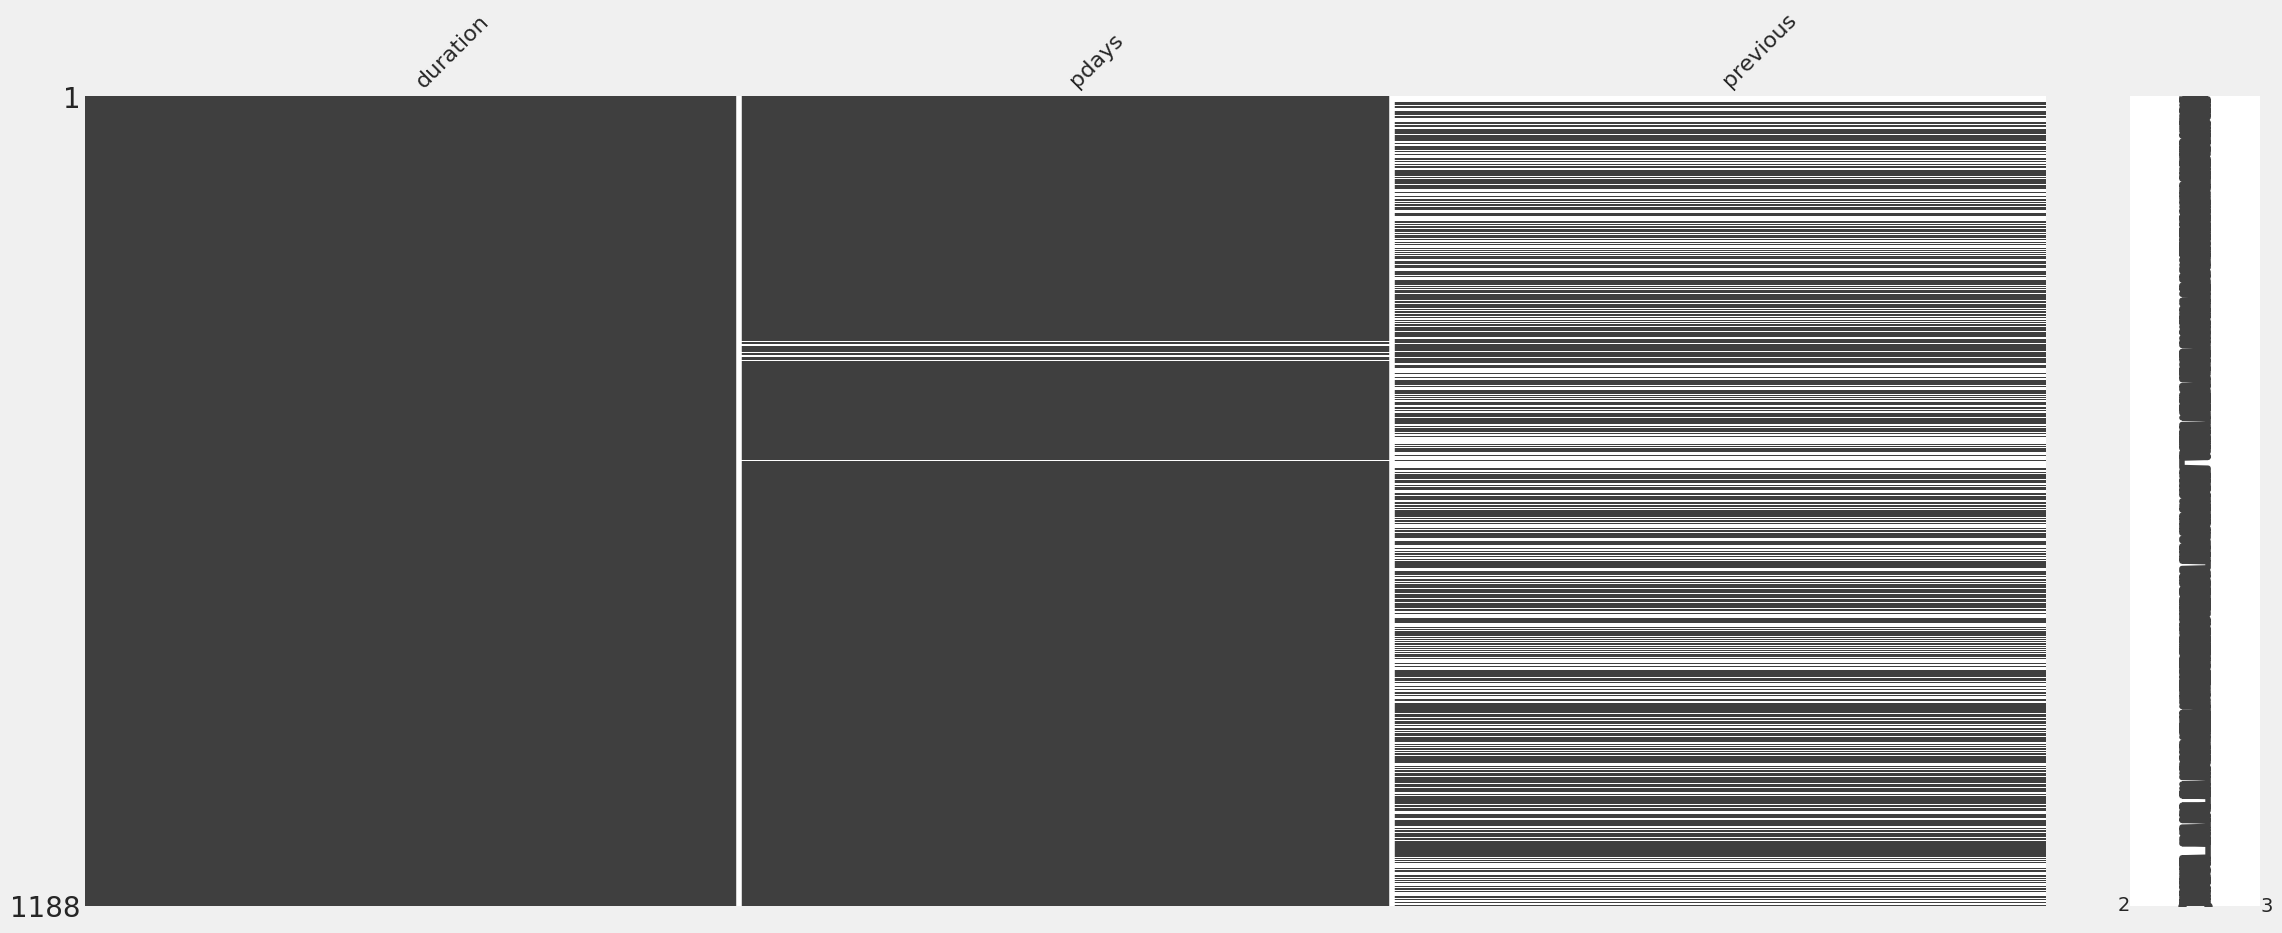

In [ ]:
import missingno as msno # librería para tratamiento de datos perdidos

msno.matrix(df[["duration","pdays","previous"]][40000:])

<Axes: >

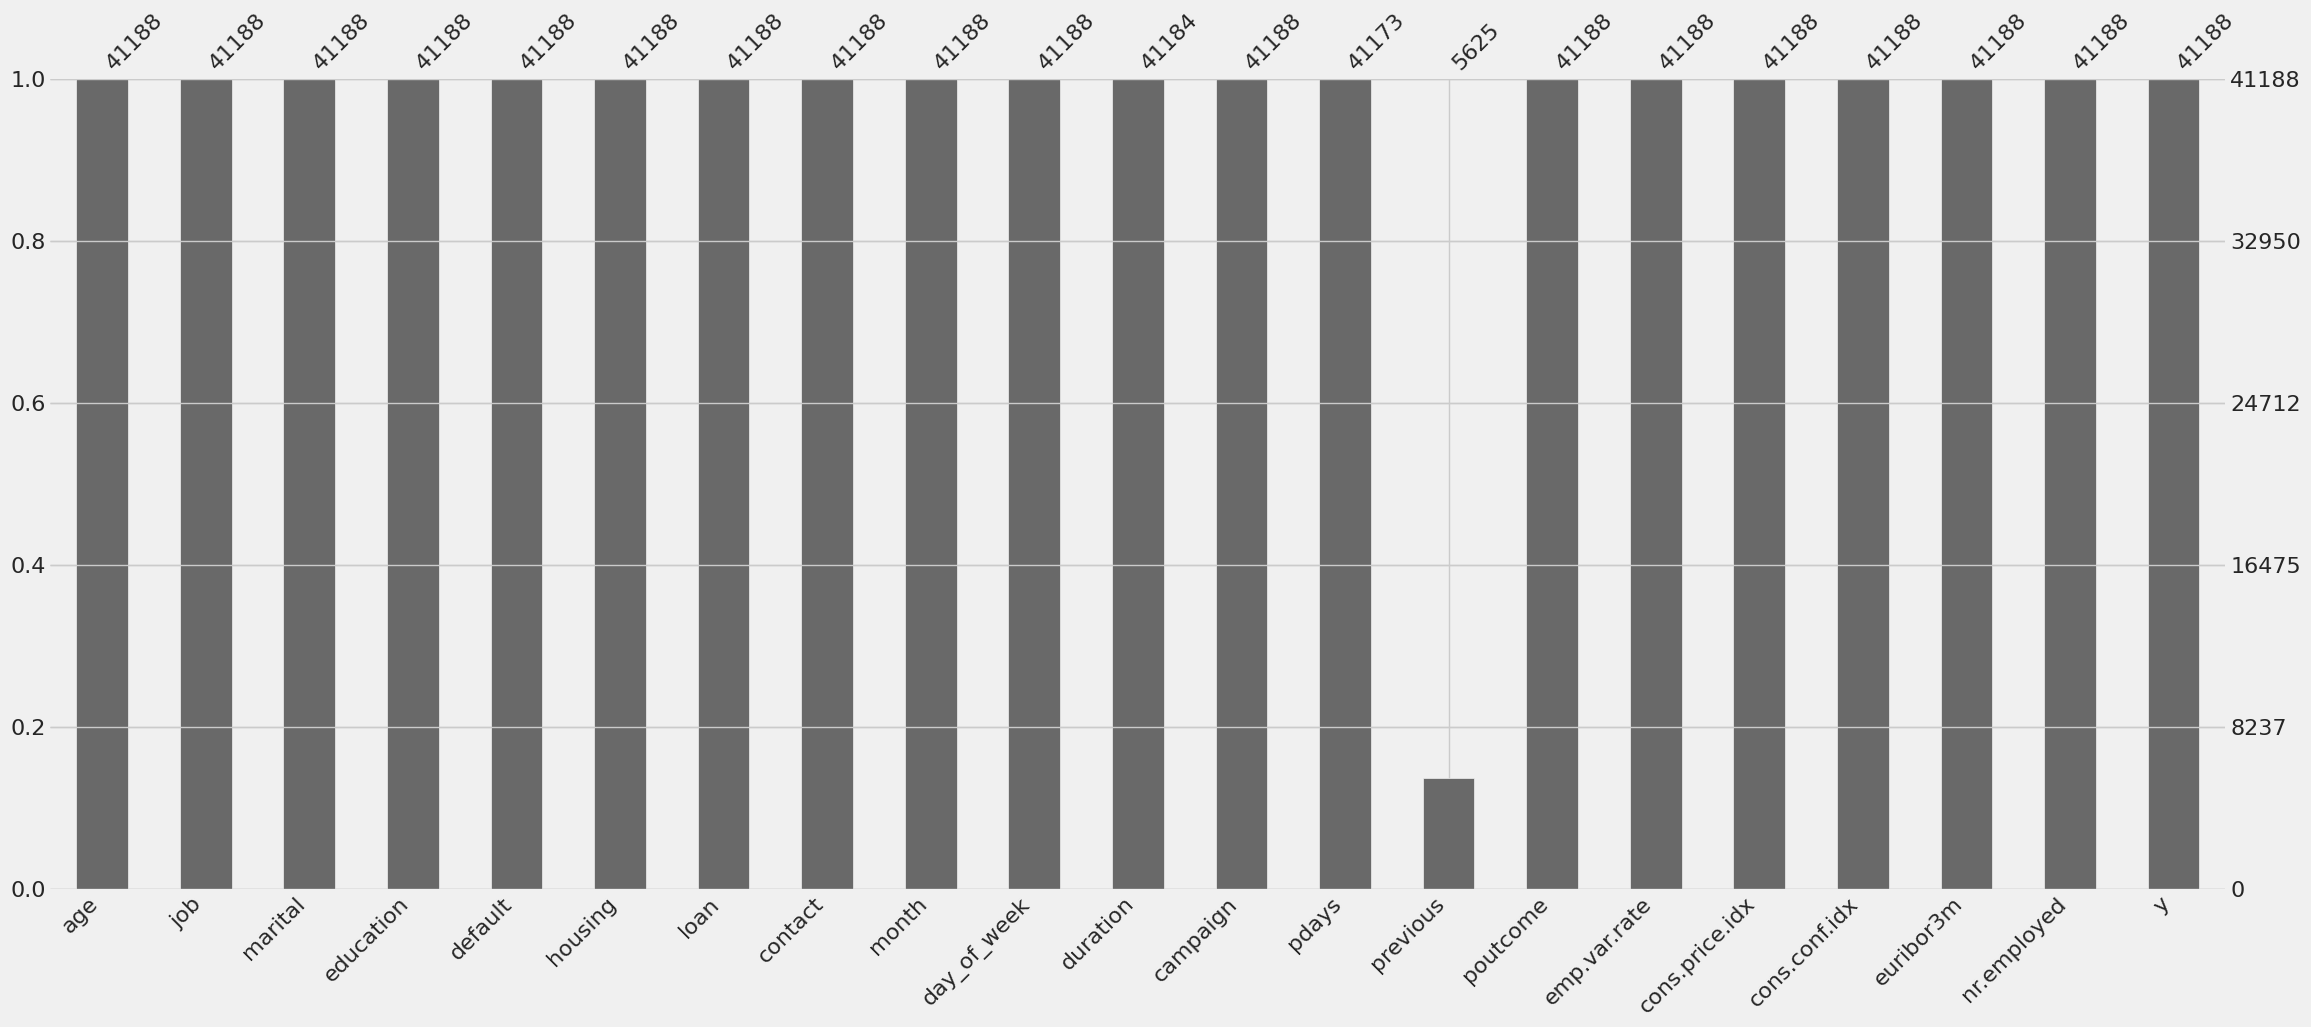

In [ ]:
msno.bar(df)

<Axes: >

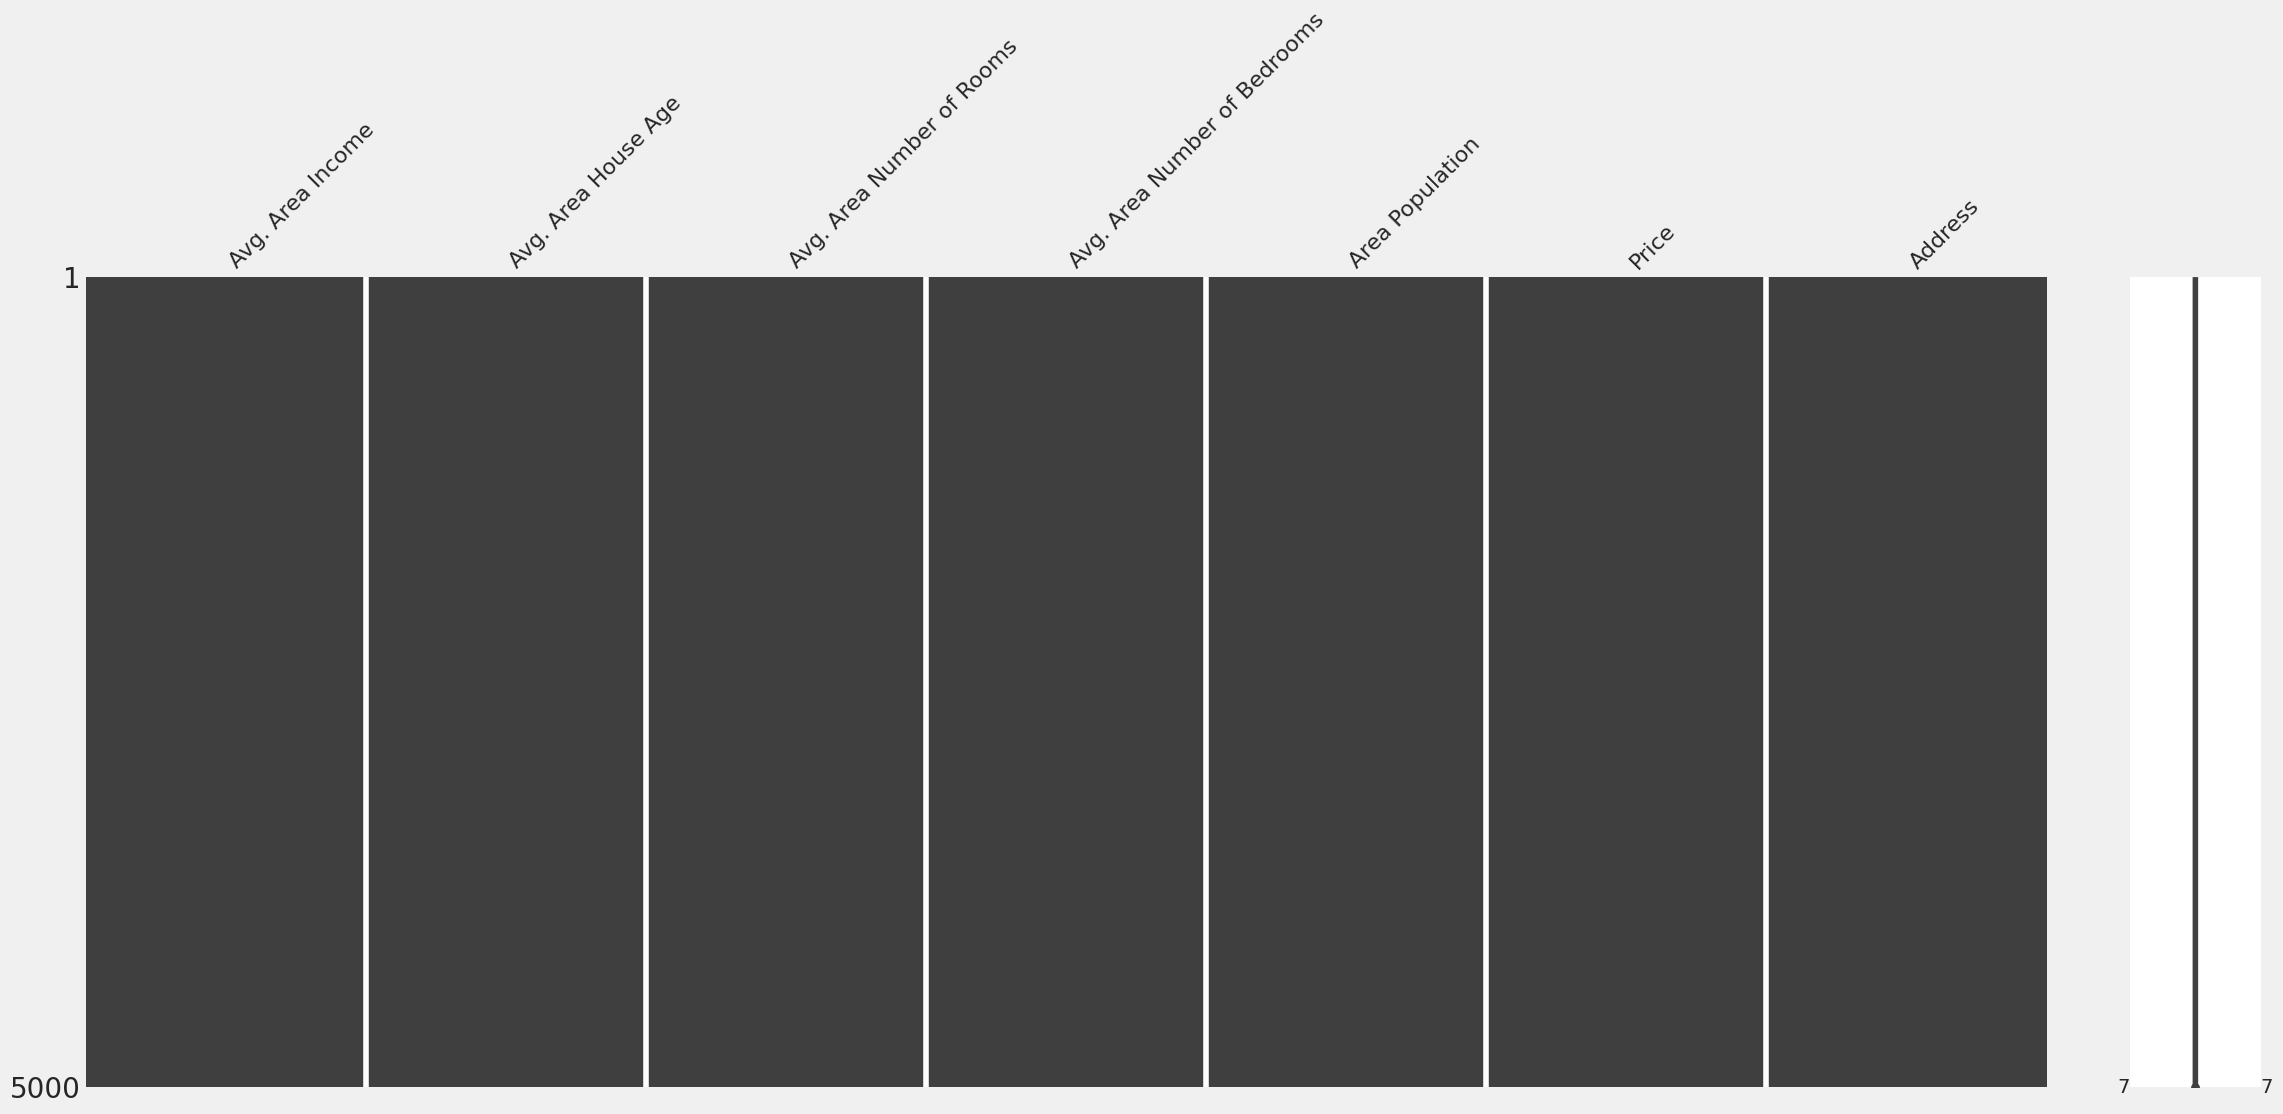

In [ ]:
import missingno as msno # librería para tratamiento de datos perdidos

msno.matrix(USAhousing)

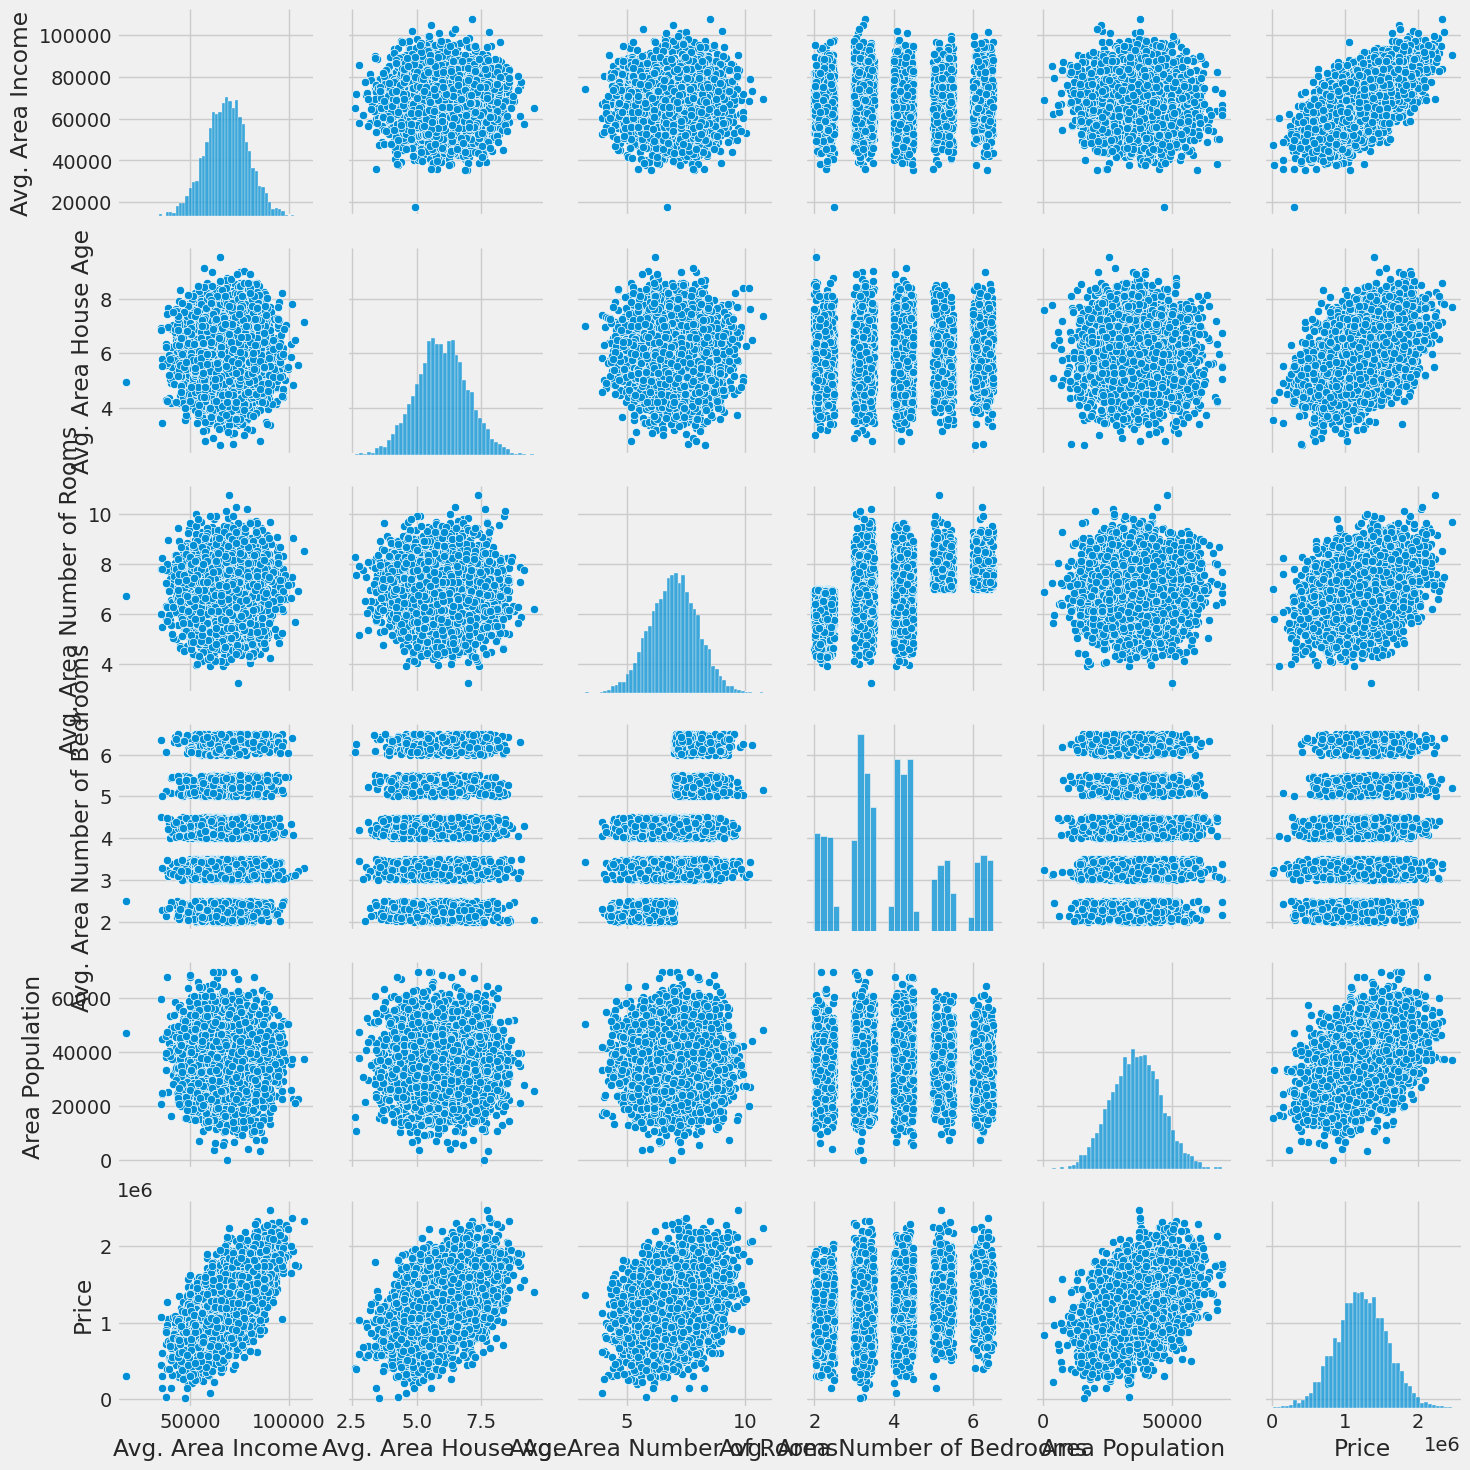

In [ ]:
sns.pairplot(USAhousing)

<Axes: xlabel='Price', ylabel='Density'>

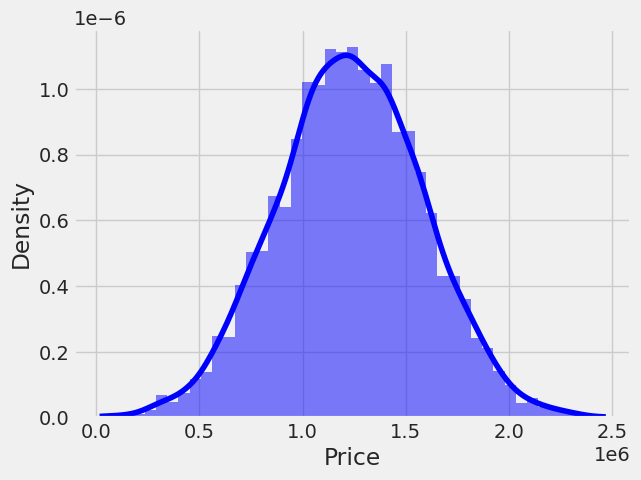

In [ ]:
sns.histplot(USAhousing['Price'], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)

## Entrenamiento de un modelo de regresión lineal

Primero necesitaremos dividir nuestros datos en una matriz **X** que contiene las características para entrenar y una matriz **Y** con la variable de destino, en este caso la columna Precio. Desecharemos la columna Dirección porque solo tiene información de texto que el modelo de regresión lineal no puede usar.




### Matrices *X* e *Y*

In [ ]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

y = USAhousing['Price']

## Data de entrenamiento y prueba

Ahora dividamos los datos en un conjunto de entrenamiento y un conjunto de prueba. Entrenaremos el modelo en el conjunto de entrenamiento y luego usaremos el conjunto de prueba para evaluar el modelo.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

#Función para las métricas

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Preparación de datos para la regresión lineal

La regresión lineal se ha estudiado en profundidad y hay mucha literatura sobre cómo se deben estructurar los datos para hacer un mejor uso del modelo.

- **Supuesto lineal**: La regresión lineal asume que la relación entre la variable dependiente e independiente es lineal.  

- **Eliminar colinealidad**: La regresión lineal sobre-ajustará sus datos cuando tenga variables de entrada altamente correlacionadas.  

- **Distribuciones gaussianas**: La regresión lineal hará predicciones más confiables si sus variables de entrada y salida tienen una distribución gaussiana.  

- **Reescalar las entradas**: La regresión lineal a menudo hará predicciones más confiables si reescala las variables de entrada usando la estandarización o la normalización.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# 1. Regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train,y_train)

LinearRegression()

## Evaluación del modelo

Evaluemos el modelo comprobando sus coeficientes y cómo podemos interpretarlos.

In [ ]:
# print the intercept
print(lin_reg.intercept_)

1228219.1492415662


In [ ]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119
Area Population,151252.342377


## Predicción de nuestro modelo



In [ ]:
pred = lin_reg.predict(X_test)

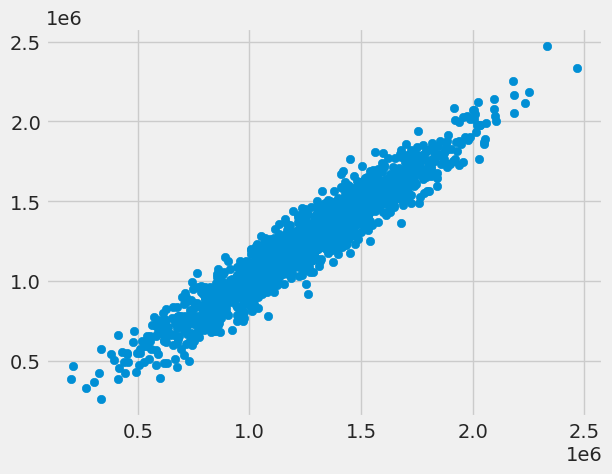

In [ ]:
plt.scatter(y_test, pred)

**Residual Histogram**

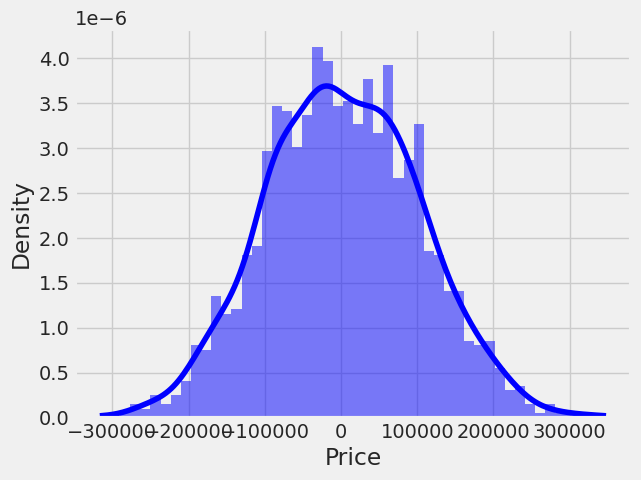

In [ ]:
sns.histplot((y_test - pred), bins=50, color="blue", label="100% Equities", kde=True, stat="density", linewidth=0);

## Métricas de evaluación

A continuación se muestra las métricas de evaluación más comunes para problemas de regresión:

**1. Error absoluto medio (MAE)**
\begin{equation}
\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|
\end{equation}

**2. Error cuadrático medio (MSE)**
\begin{equation}
\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2
\end{equation}

**3. Raíz del Error cuadrático medio (RMSE)**
\begin{equation}
\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}
\end{equation}

**4. R al cuadrado (R²)**
\begin{equation}
R^2 = \frac{SCE}{SCT} = 1 - \frac{SCR}{SCT}
\end{equation}

In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
R2 Square 0.9146818498754016
Train set evaluation:
_____________________________________
MAE: 81480.49973174892
MSE: 10287043161.197224
RMSE: 101425.06180031257
R2 Square 0.9192986579075526


In [ ]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379


# 2. Regresión de Ridge

Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

Para la estimación de los coeficientes en mínimos cuadrados debemos minimizar la suma de los errores al cuadrado. Para generar una regresión tipo rigde agregamos la penalización y mínimizamos la expresión:

\begin{equation}
\sum_{i=1}^n{(y_i - \beta_o - \sum_{j=1}^p{\beta_jx_{ij}})^2} + \lambda\sum_{j=1}^p{\beta_{j}^2}
\end{equation}

Donde la primera expresión es la suma de los errores al cuadrado y es un parámetro que debe ser tuneado.

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81428.64835535336
MSE: 10153269900.892609
RMSE: 100763.43533689494
R2 Square 0.9139628674464607
Train set evaluation:
_____________________________________
MAE: 81972.39058585507
MSE: 10382929615.143456
RMSE: 101896.66145239232
R2 Square 0.9185464334441484


In [ ]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df,results_df_2])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
0,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379


# 3. Regressión LASSO

A diferencia de Ridge, matemáticamente el único cambio es que ahora los coeficientes de la penalización están en valor absoluto en vez de elevados al cuadrado. Esto tiene efectos distintos a la ridge:  

- No penaliza de la misma manera a los coeficientes muy grandes.
- En la regresión Ridge los coeficientes tienden hacia cero, en la regresión Lasso los coeficientes puede volverse cero, lo que implica que la regresión Lasso tiene otro efecto y es que automáticamente depura las variables que no agregan poder predictivo al modelo.

\begin{equation}
\sum_{i=1}^n{(y_i - \beta_o - \sum_{j=1}^p{\beta_jx_{ij}})^2} + \lambda\sum_{j=1}^p{|\beta_{j}|}
\end{equation}

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1,
              precompute=True,
#               warm_start=True,
              positive=True,
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.6985172622
MSE: 10068453390.364523
RMSE: 100341.68321472648
R2 Square 0.914681588551116
Train set evaluation:
_____________________________________
MAE: 81480.63002185506
MSE: 10287043196.634295
RMSE: 101425.0619750084
R2 Square 0.9192986576295505


In [ ]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df,results_df_2])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
0,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
0,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379


# 4. Elastic Net

Es una combinación de Ridge y Lasso. Se decide entonces qué peso se le da a cada método de penalización y se implementa la regresión:


\begin{equation}
\sum_{i=1}^n{(y_i - \beta_o - \sum_{j=1}^p{\beta_jx_{ij}})^2} + \lambda_{1}\sum_{j=1}^p{\beta_{j}^2} +\lambda_{2}\sum_{j=1}^p{|\beta_{j}|}
\end{equation}

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81184.43147330944
MSE: 10078050168.470106
RMSE: 100389.49232100991
R2 Square 0.9146002670381437
Train set evaluation:
_____________________________________
MAE: 81577.88831531754
MSE: 10299274948.10146
RMSE: 101485.34351373828
R2 Square 0.9192027001474953


In [ ]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df,results_df_2])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
0,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
0,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
0,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545


¿Como podemos saber si usar una regresión lineal?

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Datos_5_industrias.csv to Datos_5_industrias.csv


In [ ]:
df_finance = pd.read_csv('Datos_5_industrias.csv', delimiter = ';', header = 0, index_col=0, parse_dates=True, na_values=-99.99)/100
df_finance.index = pd.to_datetime(df_finance.index, format="%Y%m").to_period('M')
df_finance.columns = df_finance.columns.str.strip()
df_finance

<ipython-input-36-014763158368>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_finance = pd.read_csv('Datos_5_industrias.csv', delimiter = ';', header = 0, index_col=0, parse_dates=True, na_values=-99.99)/100


,Mkt-RF,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM,RF,Cnsmr,Manuf,HiTec,Hlth,Other
Fecha,,,,,,,,,,,,,
1926-07,0.0296,0.010874,0.009081,-0.000695,0.057168,0.018971,0.020066,0.0022,0.0543,0.0273,0.0183,0.0177,0.0213
1926-08,0.0264,0.007030,0.015075,0.053842,0.027154,0.027196,0.056796,0.0025,0.0276,0.0233,0.0241,0.0425,0.0435
1926-09,0.0036,-0.029117,-0.001359,-0.004374,0.014287,0.000808,-0.007928,0.0023,0.0216,-0.0044,0.0106,0.0069,0.0029
1926-10,-0.0324,-0.038196,-0.043572,-0.020112,-0.035898,-0.023377,-0.039998,0.0032,-0.0390,-0.0242,-0.0226,-0.0057,-0.0284
1926-11,0.0253,0.031806,0.036608,0.020944,0.031292,0.029242,0.031934,0.0031,0.0370,0.0250,0.0307,0.0542,0.0211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08,-0.0239,-0.078268,-0.055493,-0.053284,-0.008988,-0.028246,-0.055092,0.0045,-0.0182,-0.0182,-0.0158,-0.0022,-0.0335
2023-09,-0.0524,-0.068099,-0.058368,-0.060807,-0.054008,-0.027077,-0.030848,0.0043,-0.0494,-0.0395,-0.0582,-0.0471,-0.0341
2023-10,-0.0319,-0.091193,-0.060789,-0.062047,-0.017960,-0.036544,-0.043317,0.0047,-0.0343,-0.0305,-0.0168,-0.0458,-0.0253


<Axes: title={'center': 'Julio 1926 - Dezembro 2023'}, xlabel='Período', ylabel='Retorno'>

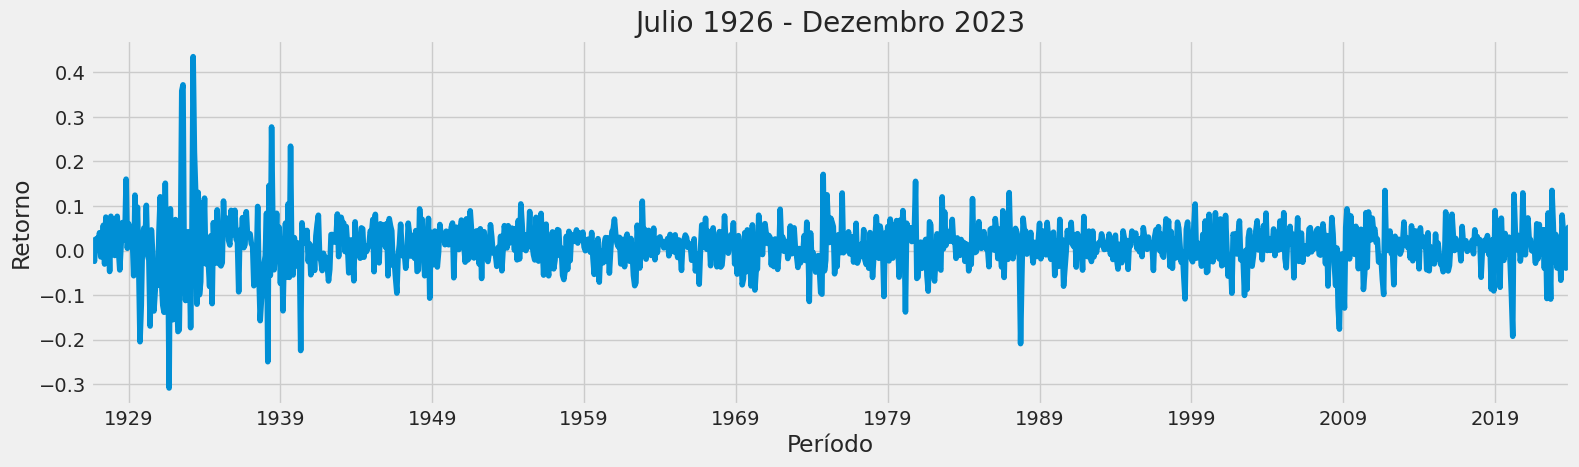

In [ ]:
df_finance['Manuf'].plot(title = "Julio 1926 - Dezembro 2023", figsize=(17,4.5),xlabel='Período',ylabel='Retorno')

In [ ]:
df_finance.isnull().sum()

,0
Mkt-RF,0
SMALL LoBM,0
ME1 BM2,0
SMALL HiBM,0
BIG LoBM,0
ME2 BM2,0
BIG HiBM,0
RF,0
Cnsmr,0
Manuf,0


In [ ]:
Y = df_finance['Manuf'].tolist()
X1=df_finance.iloc[:,[1,2,3,4,5,6,7]].values

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PComponents = pca.fit_transform(X1)
PDf = pd.DataFrame({'Component_1':PComponents[:,0], 'Component_2':PComponents[:,1],'Return': Y})
import plotly.express as px
fig = px.scatter_3d(PDf, x= 'Component_1', y='Component_2', z='Return')
fig.show()

Veamos como usariamos en nuestro datos para nuestro problema principal

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PComponents = pca.fit_transform(X)
PDf = pd.DataFrame({'Component_1':PComponents[:,0], 'Component_2':PComponents[:,1],'Return': y})
import plotly.express as px
fig = px.scatter_3d(PDf, x= 'Component_1', y='Component_2', z='Return')
fig.show()

# 5. Regresión polinomial

Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

La Regresión Polinomial es un caso especial de la Regresión Lineal, enriquece el modelo lineal al aumentar predictores adicionales, obtenidos al elevar cada uno de los predictores originales a una potencia. Por ejemplo, una regresión cúbica utiliza tres variables, como predictores. Este enfoque proporciona una forma sencilla de proporcionar un ajuste no lineal a los datos.

\begin{equation}
y_i = \beta_0 + \beta_1x_i + \beta_2x^2_i + \beta_3x^3_i + \epsilon_i
\end{equation}


Veamos un ejemplo:

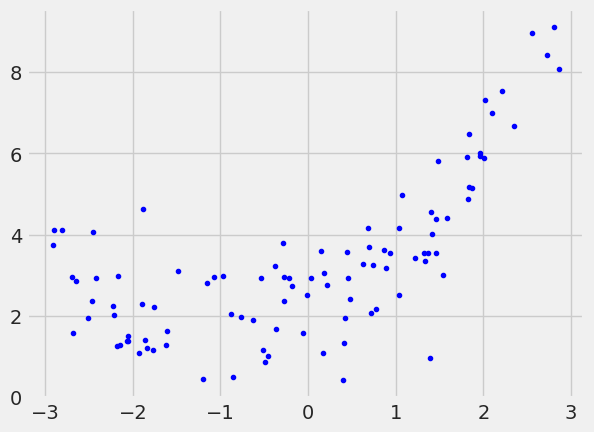

In [ ]:
m = 100
x_p = 6*np.random.rand(m,1) - 3
y_p = 0.5*x_p**2 + x_p + 2 + np.random.randn(m,1)

plt.plot(x_p, y_p, "b.")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(x_p, y_p, test_size=0.2, random_state=42)

poly_reg2 = PolynomialFeatures(degree=2,include_bias = False)
X_train_2_p = poly_reg2.fit_transform(X_train_p)
X_test_2_p = poly_reg2.transform(X_test_p)
print(X_test_p[0])
X_test_2_p[0]

[2.02137921]


array([2.02137921, 4.08597389])

In [ ]:
lin_reg_p = LinearRegression(fit_intercept=True)
lin_reg_p.fit(X_train_2_p,y_train_p)

test_pred = lin_reg_p.predict(X_test_2_p)
train_pred = lin_reg_p.predict(X_train_2_p)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test_p, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train_p, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.6953472826647067
MSE: 0.6785646391091966
RMSE: 0.8237503499903334
R2 Square 0.7599714350684922
Train set evaluation:
_____________________________________
MAE: 0.7925774732965174
MSE: 0.9532893055298673
RMSE: 0.9763653545317282
R2 Square 0.7544058345707148


In [ ]:
lin_reg_p.intercept_, lin_reg_p.coef_

(array([2.08620028]), array([[0.9314709 , 0.47735281]]))

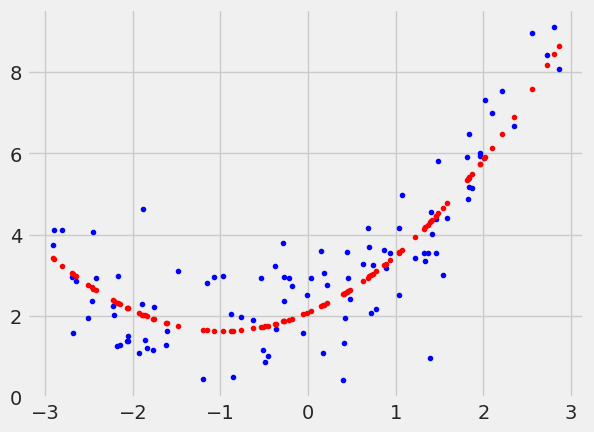

In [ ]:
# Gráficamente
y_p_r = lin_reg_p.coef_[0][1]*x_p**2 + lin_reg_p.coef_[0][0]*x_p + lin_reg_p.intercept_[0]
plt.plot(x_p, y_p, "b.")
plt.plot(x_p, y_p_r, "r.")

In [ ]:
poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81174.51844119695
MSE: 10081983997.620695
RMSE: 100409.08324260656
R2 Square 0.914566932419506
Train set evaluation:
_____________________________________
MAE: 81363.0618562117
MSE: 10266487151.007814
RMSE: 101323.67517519198
R2 Square 0.9194599187853729


In [ ]:
results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df,results_df_2])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
0,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
0,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
0,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
0,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000


# 6. Descenso de gradiente estocástico

Es un algoritmo de optimización muy genérico capaz de encontrar soluciones óptimas a una amplia gama de problemas. La idea general es ajustar los parámetros de forma iterativa para minimizar una función de coste.



In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 81135.56572130133
MSE: 10068422010.503235
RMSE: 100341.52684957128
R2 Square 0.914681854458879
Train set evaluation:
_____________________________________
MAE: 81480.49768496423
MSE: 10287043161.250324
RMSE: 101425.06180057435
R2 Square 0.9192986579071359


In [ ]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df,results_df_2])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
0,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
0,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
0,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
0,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
0,Stochastic Gradient Descent,81135.565721,1.006842e+10,100341.526850,0.914682,0.000000
0,Stochastic Gradient Descent,81135.565721,1.006842e+10,100341.526850,0.914682,0.000000


# 7. Regresión usando Random Forest

- El **Random Forest** es un algoritmo de aprendizaje supervisado que utiliza un método de aprendizaje por conjuntos para clasificación y regresión.

- Los **Random Forest** es una técnica de **bagging** y no una técnica de **boosting**. Los árboles en bosques aleatorios se ejecutan en paralelo. No hay interacción entre estos árboles mientras se construyen.

- Funciona construyendo una multitud de árboles de decisión en el momento del entrenamiento y generando la clase que es el modo de las clases (clasificación) o la predicción media (regresión) de los árboles individuales.

<img src="RandomForest.png">


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 94105.55717287865
MSE: 14133092462.451172
RMSE: 118882.68361057118
R2 Square 0.8802385082389627
Train set evaluation:
_____________________________________
MAE: 35340.543978669535
MSE: 1990357674.864468
RMSE: 44613.42482778551
R2 Square 0.9843857430081131


In [ ]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df,results_df_2])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
0,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
0,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
0,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
0,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
0,Stochastic Gradient Descent,81135.565721,1.006842e+10,100341.526850,0.914682,0.000000
0,Stochastic Gradient Descent,81135.565721,1.006842e+10,100341.526850,0.914682,0.000000
0,Random Forest Regressor,94105.557173,1.413309e+10,118882.683611,0.880239,0.000000
0,Random Forest Regressor,94105.557173,1.413309e+10,118882.683611,0.880239,0.000000


# 8. Regresión usando SVM

- Las máquinas de vectores de soporte (SVM) son bien conocidas en problemas de clasificación. Sin embargo, el uso de SVM en regresión no está tan bien documentado. Estos tipos de modelos se conocen como regresión de vectores de soporte (SVR).

- En contraste con MCO, la función objetivo de la RVS es minimizar los coeficientes, más específicamente, la norma del vector de coeficientes, no el error al cuadrado.


In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 87205.73051021632
MSE: 11720932765.275513
RMSE: 108263.25676458987
R2 Square 0.9006787511983232
Train set evaluation:
_____________________________________
MAE: 73692.5684807321
MSE: 9363827731.411339
RMSE: 96766.87310960988
R2 Square 0.9265412370487783


In [ ]:
results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df,results_df_2])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
0,Ridge Regression,81428.648355,1.015327e+10,100763.435337,0.913963,0.917379
0,Lasso Regression,81135.698517,1.006845e+10,100341.683215,0.914682,0.917379
0,Elastic Net Regression,81184.431473,1.007805e+10,100389.492321,0.914600,0.879545
0,Polynomail Regression,81174.518441,1.008198e+10,100409.083243,0.914567,0.000000
0,Stochastic Gradient Descent,81135.565721,1.006842e+10,100341.526850,0.914682,0.000000
0,Stochastic Gradient Descent,81135.565721,1.006842e+10,100341.526850,0.914682,0.000000
0,Random Forest Regressor,94105.557173,1.413309e+10,118882.683611,0.880239,0.000000
0,Random Forest Regressor,94105.557173,1.413309e+10,118882.683611,0.880239,0.000000
0,SVM Regressor,87205.730510,1.172093e+10,108263.256765,0.900679,0.000000


# 9. Comparación de modelos

<Axes: ylabel='Model'>

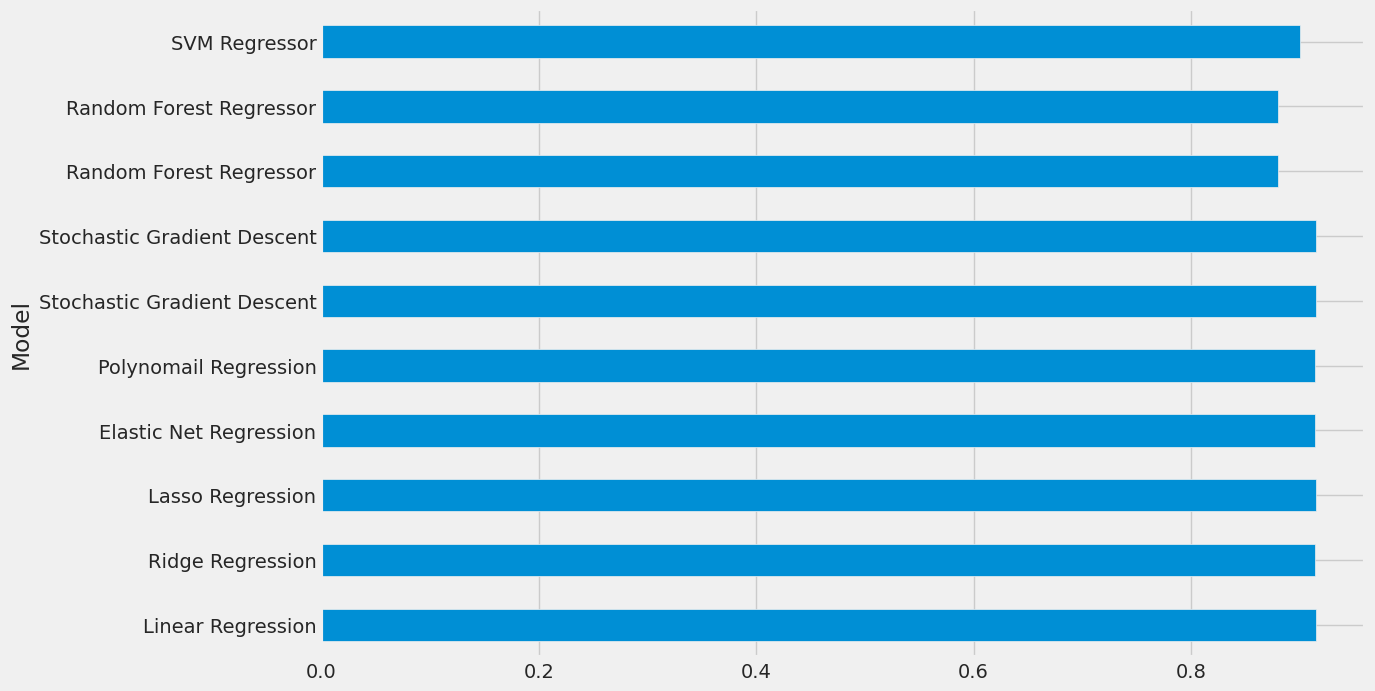

In [ ]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

# Conclusiones

- En este notebook se desarrollo los diferentes algoritmos de aprendizaje automático basados en la regresión, asi como las métricas necesarias para la validación del algoritmo. Recordar que existen otros algoritmos y/o modelos como: La regresión t-student, regresión lineal bayesiana, teoría de cópulas,  árboles de decisión, etc.

- El mejor modelo para nuestro conjunto de datos, según las métricas de evaluación es el: "Regresión LINEAL".


## Referencias:

- [Scikit-learn library](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

- [Linear Regression for Machine Learning by Jason Brownlee PhD](https://machinelearningmastery.com/linear-regression-for-machine-learning/)

- An Introduction to Statistical Learning: with Applications in R (Springer Texts in Statistics).

- Linear Models with R by Julian J.Faraway.

- An Introduction to Statistical Learning by James, Gareth et al.

- Applied Predictive Modeling by Max Kuhn and Kjell Johnson.

- <https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/>

- <https://medium.com/datos-y-ciencia/machine-learning-supervisado-fundamentos-de-la-regresi%C3%B3n-lineal-bbcb07fe7fd>



In [ ]:
# Regresión Logística
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [ ]:
RL = pd.read_csv('diabetes.csv', delimiter = ',', header = 0, index_col=0, parse_dates=True)
RL

<ipython-input-60-5efad225375a>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [ ]:
RL.reset_index()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
RL.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

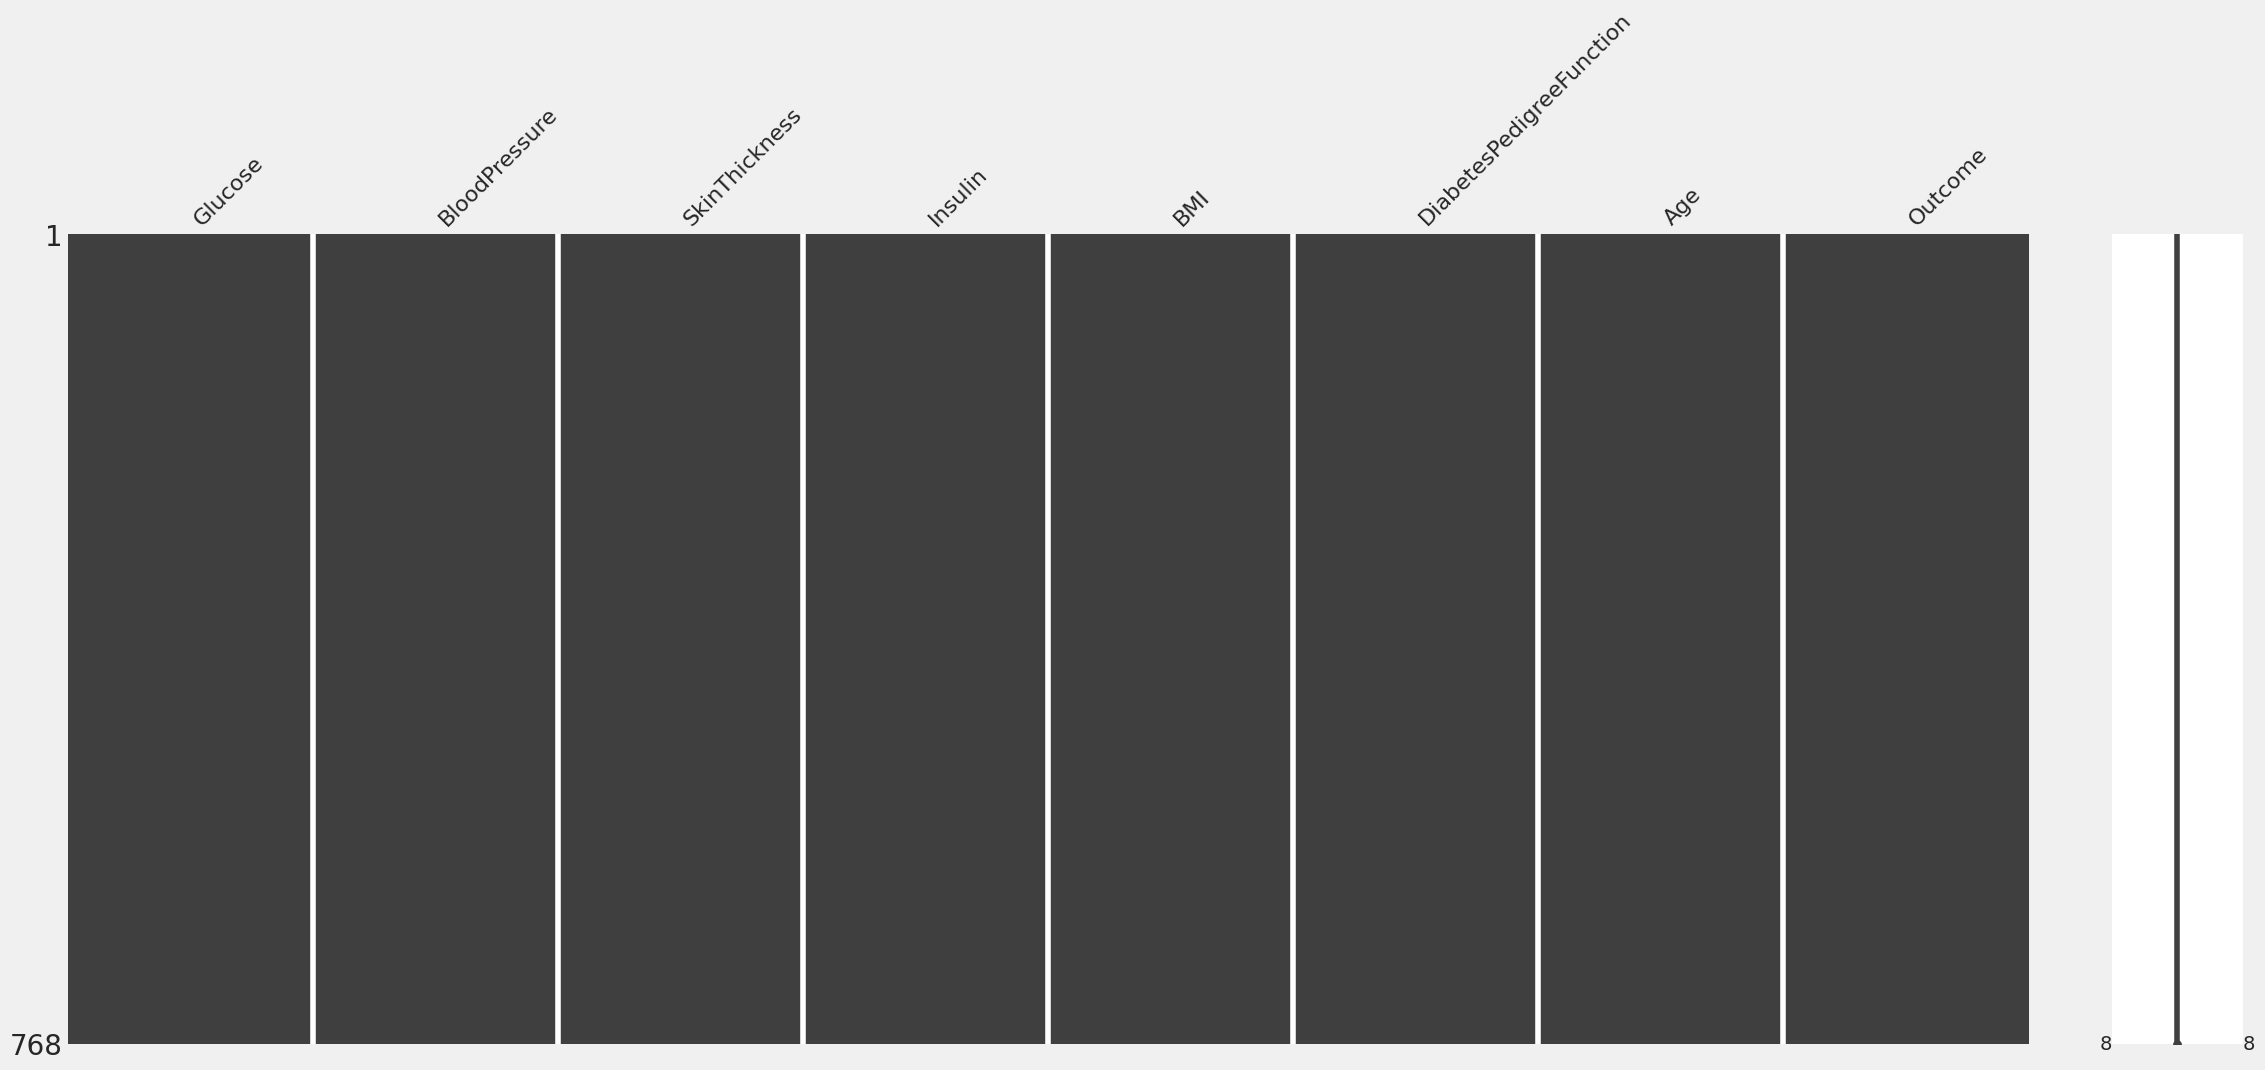

In [ ]:
msno.matrix(RL)

In [ ]:
RL.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
#conjunto de datos dividido en caracteristicas y objetivo
feature_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = RL[feature_cols] # Features
y = RL.Outcome # Target
print(X.head())
y.head()

             Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Pregnancies                                                         
6                148             72             35        0  33.6   
1                 85             66             29        0  26.6   
8                183             64              0        0  23.3   
1                 89             66             23       94  28.1   
0                137             40             35      168  43.1   

             DiabetesPedigreeFunction  Age  
Pregnancies                                 
6                               0.627   50  
1                               0.351   31  
8                               0.672   32  
1                               0.167   21  
0                               2.288   33  


,Outcome
Pregnancies,
6,1
1,0
8,1
1,0
0,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test,y_pred)
print (matriz)

[[82 17]
 [19 36]]


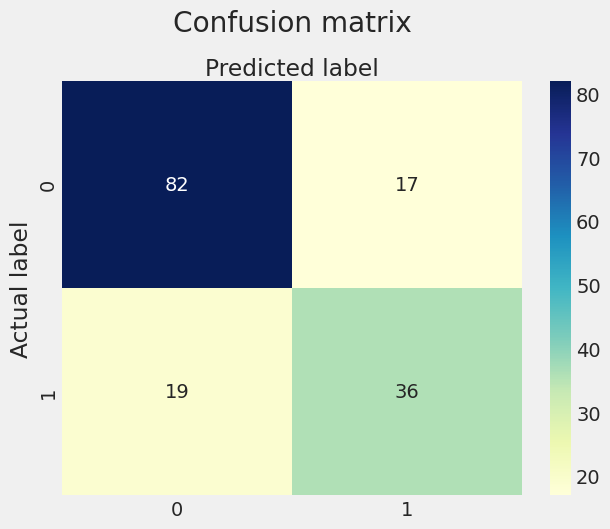

In [ ]:
# importar la clase de métricas
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7662337662337663


In [ ]:
#Aquí se muestran los valores en su valor de [0,1]
y_pred_proba = model.predict_proba(X_test)[::,1]
y_pred_proba

array([0.26450533, 0.19201701, 0.11528148, 0.13253455, 0.46464946,
       0.45674604, 0.01667044, 0.72888411, 0.54847617, 0.81547619,
       0.20109543, 0.90442467, 0.31900953, 0.30790788, 0.08371905,
       0.41038458, 0.14214472, 0.06486592, 0.8658665 , 0.59852225,
       0.22121224, 0.08922347, 0.42756911, 0.10078039, 0.4549802 ,
       0.8743738 , 0.10588792, 0.03478215, 0.25694801, 0.12687289,
       0.92443715, 0.90237347, 0.7573047 , 0.86176607, 0.69025833,
       0.60677058, 0.97913118, 0.3068701 , 0.45340569, 0.76396943,
       0.06643029, 0.69793968, 0.63039358, 0.22141381, 0.02348262,
       0.50120185, 0.68411837, 0.20584852, 0.35538634, 0.97199234,
       0.04408418, 0.62932045, 0.76010902, 0.25099203, 0.10380137,
       0.04034576, 0.81306239, 0.00536728, 0.41448023, 0.75743042,
       0.7148636 , 0.36917111, 0.20771284, 0.14116563, 0.08873374,
       0.67030079, 0.05359549, 0.72835802, 0.04489152, 0.73134809,
       0.64254274, 0.07150252, 0.1685472 , 0.13342943, 0.07801

#DATA & ANALYTICS




Web: www.datayanalytics.com